In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!pip install tensorflow tensorflow.gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [75]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [76]:
# Avoid OOM error by setting up GPU consumption

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [77]:
tf.config.list_physical_devices('GPU')

[]

In [78]:
import cv2
import imghdr

In [79]:
os.data_dir = ("/content/drive/MyDrive/Colab Notebooks/Leaf Disease Detection")

In [80]:
len(os.data_dir)

61

In [82]:
image_ext = ['jpeg','jpg','bmp','png']

In [83]:
import numpy as np
from matplotlib import pyplot as plt

In [84]:
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/Leaf Disease Detection")

Found 4187 files belonging to 4 classes.


In [85]:
data_iterator = data.as_numpy_iterator()

In [86]:
batch = data_iterator.next()

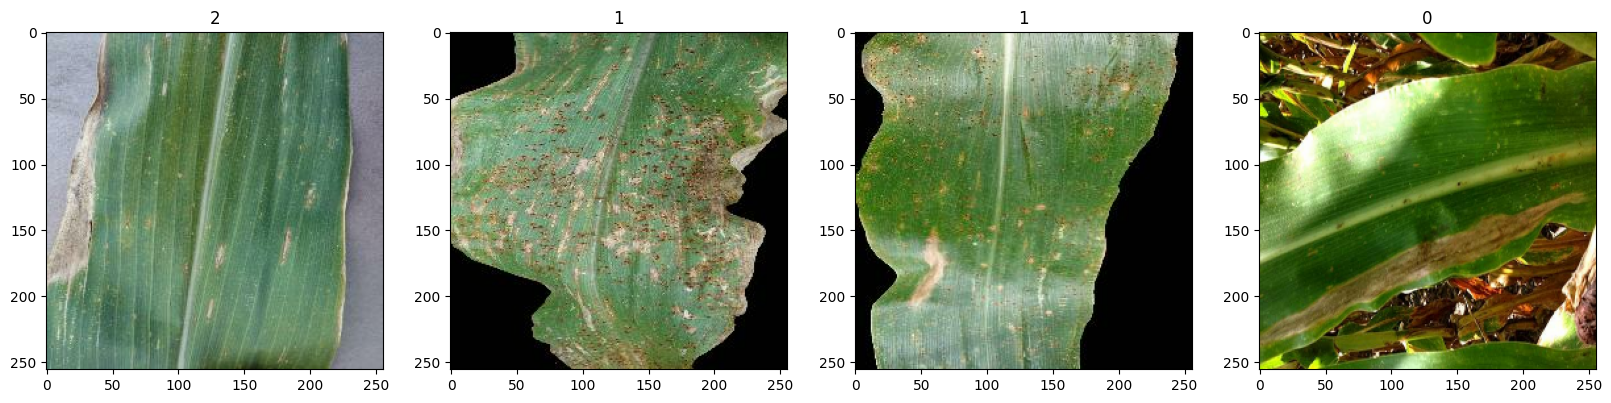

In [87]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [88]:
data = data.map(lambda x,y:(x/255,y))

In [89]:
data.as_numpy_iterator().next()

(array([[[[0.34509805, 0.5137255 , 0.23529412],
          [0.34509805, 0.5137255 , 0.23529412],
          [0.33333334, 0.5019608 , 0.23137255],
          ...,
          [0.3254902 , 0.5176471 , 0.3019608 ],
          [0.4       , 0.57254905, 0.3647059 ],
          [0.33333334, 0.5058824 , 0.29803923]],
 
         [[0.34117648, 0.50980395, 0.23137255],
          [0.34117648, 0.50980395, 0.23137255],
          [0.33333334, 0.5019608 , 0.22352941],
          ...,
          [0.3372549 , 0.5294118 , 0.3137255 ],
          [0.38431373, 0.5568628 , 0.34901962],
          [0.36862746, 0.5411765 , 0.33333334]],
 
         [[0.3372549 , 0.5058824 , 0.22352941],
          [0.33333334, 0.5019608 , 0.21960784],
          [0.3254902 , 0.49411765, 0.21176471],
          ...,
          [0.3529412 , 0.5411765 , 0.3372549 ],
          [0.36862746, 0.5411765 , 0.34117648],
          [0.41568628, 0.5882353 , 0.3882353 ]],
 
         ...,
 
         [[0.33333334, 0.5137255 , 0.21960784],
          [0.32941

In [90]:
train_size = int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [91]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size+test_size).take(val_size)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout

In [93]:
model = Sequential()

In [94]:
from keras.api._v2.keras import activations

In [95]:
from posix import access
model.add(Conv2D(16,(3,3),1, activation= 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [96]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [98]:
logdir = 'logs'

In [99]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [100]:
hist = model.fit(train,epochs = 10,validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/10
91/91 [==============================] - 236s 3s/step - loss: -769408.3750 - accuracy: 0.3019 - val_loss: -6158672.0000 - val_accuracy: 0.3245
Epoch 2/10
91/91 [==============================] - 211s 2s/step - loss: -175786208.0000 - accuracy: 0.3128 - val_loss: -717632576.0000 - val_accuracy: 0.3149
Epoch 3/10
91/91 [==============================] - 227s 2s/step - loss: -3688724992.0000 - accuracy: 0.3111 - val_loss: -9193771008.0000 - val_accuracy: 0.3233
Epoch 4/10
91/91 [==============================] - 227s 2s/step - loss: -25878732800.0000 - accuracy: 0.3070 - val_loss: -50736107520.0000 - val_accuracy: 0.3233
Epoch 5/10
91/91 [==============================] - 227s 2s/step - loss: -112672743424.0000 - accuracy: 0.3043 - val_loss: -170690494464.0000 - val_accuracy: 0.3257
Epoch 6/10
91/91 [==============================] - 227s 2s/step - loss: -342369140736.0000 - accuracy: 0.3060 - val_loss: -499182632960.0000 - val_accuracy: 0.3293
Epoch 7/10
91/91 [===============

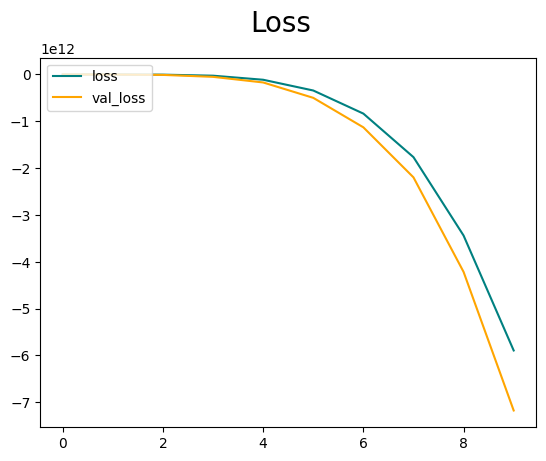

In [101]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

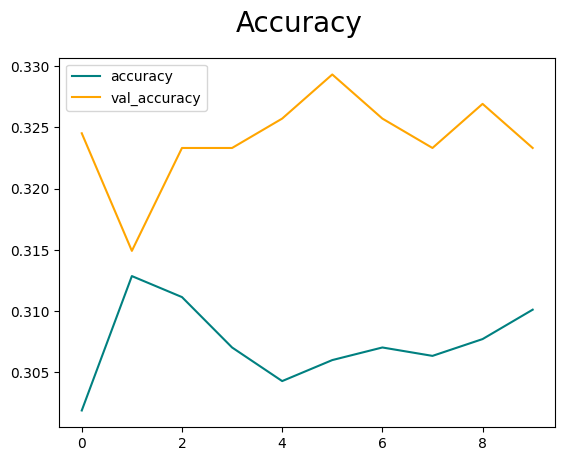

In [102]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [103]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [104]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [105]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 512ms/step


In [106]:
print(f'Precision: {pre.result().numpy()}, Recall :{re.result().numpy()}, Accuracy :{acc.result().numpy()}')


Precision: 0.6899038553237915, Recall :1.0, Accuracy :0.3125


In [107]:
import cv2

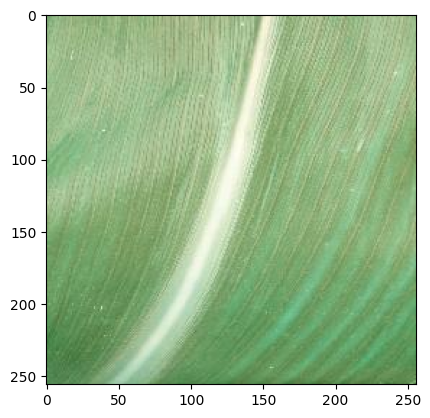

In [109]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Leaf Disease Detection/Healthy-20230828T204253Z-001/Healthy/Corn_Health (100).jpg')
plt.imshow(img)
plt.show() # Healthy

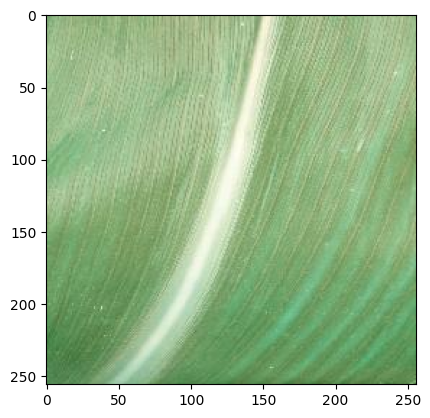

In [110]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [111]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 315ms/step


In [112]:
yhat

array([[1.]], dtype=float32)

In [120]:
if yhat > 0.5:
    print(f'Predicted class is Healhy')
else:
    print(f'Predicted class is Blight')

Predicted class is Healhy


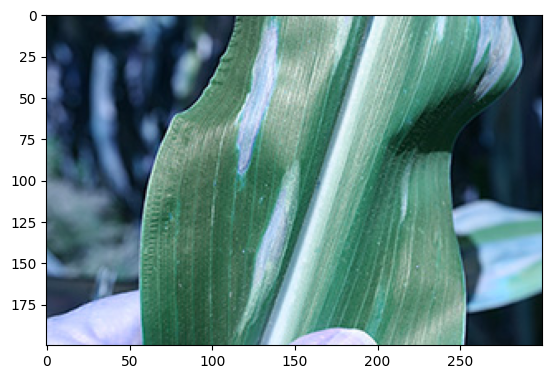

In [132]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Leaf Disease Detection/Blight-20230828T204242Z-001/Blight/Corn_Blight (100).jpg')
plt.imshow(img)
plt.show() # Blight

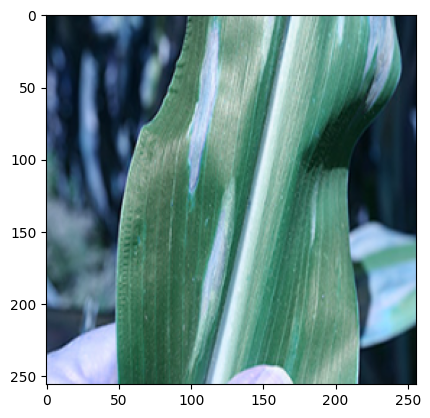

In [133]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [134]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


In [135]:
yhat

array([[1.]], dtype=float32)

In [137]:
if yhat > 0.5:
    print(f'Predicted class is Blight')
else:
    print(f'Predicted class is Common ')

Predicted class is Blight


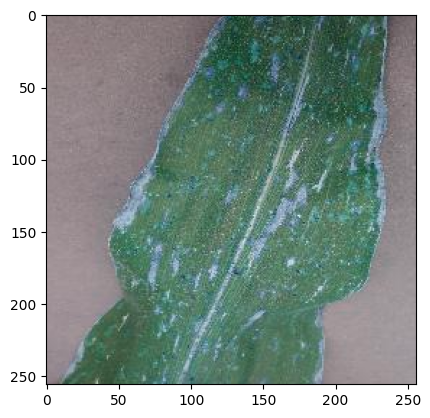

In [138]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Leaf Disease Detection/Gray_Leaf_Spot-20230828T204249Z-001/Gray_Leaf_Spot/Corn_Gray_Spot (104).JPG')
plt.imshow(img)
plt.show() # Gray

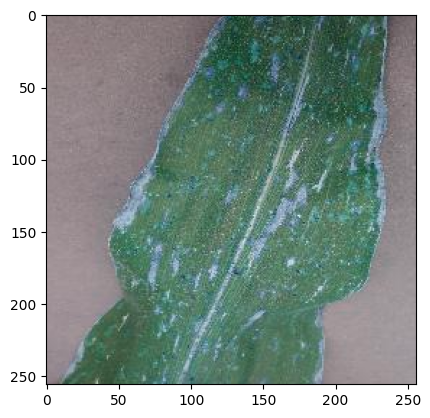

In [139]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [140]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 111ms/step


In [141]:
yhat

array([[1.]], dtype=float32)

In [144]:
if yhat > 0.5:
    print(f'Predicted class is Gray')
else:
    print(f'Predicted class is Healthy ')

Predicted class is Gray


In [145]:
from tensorflow.keras.models import load_model

In [146]:
model.save(os.path.join("/content/drive/MyDrive/Colab Notebooks",'Leaf disease detection/4class'))

In [149]:
New_model = load_model("/content/drive/MyDrive/Colab Notebooks/Leaf disease detection/4class")


In [150]:
New_Prediction = New_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 103ms/step


In [151]:
New_Prediction

array([[1.]], dtype=float32)